In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Plastic_Recycling_Data.csv")
print("Initial Data Preview:")
df.head()

Initial Data Preview:


,State,Year,Plastic_Collected_Tons,Plastic_Recycled_Tons,Recycling_Rate_%,Grade_1_Tons,Grade_2_Tons,Grade_3_Tons,Grade_4_Tons,Grade_5_Tons,Grade_6_Tons,Grade_7_Tons
0,Chhattisgarh,2018-2019,28.8,4.0,14.9,4.9,4.0,2.2,2.8,3.9,3.7,4.9
1,Karnataka,2017-2018,11.2,9.6,92.8,1.0,1.2,1.9,1.2,2.1,1.9,1.6
2,Bihar,2021-2022,10.8,5.1,50.6,1.8,2.2,1.4,2.7,3.1,3.1,0.9
3,Kerala,2021-2022,25.6,38.7,80.8,4.5,4.6,5.7,8.0,5.2,6.2,9.8
4,Uttar Pradesh,2016-2017,51.9,12.3,22.3,8.3,5.8,4.5,8.3,3.1,10.8,6.4


In [ ]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   1000 non-null   object 
 1   Year                    1000 non-null   object 
 2   Plastic_Collected_Tons  1000 non-null   float64
 3   Plastic_Recycled_Tons   1000 non-null   float64
 4   Recycling_Rate_%        1000 non-null   float64
 5   Grade_1_Tons            1000 non-null   float64
 6   Grade_2_Tons            1000 non-null   float64
 7   Grade_3_Tons            1000 non-null   float64
 8   Grade_4_Tons            1000 non-null   float64
 9   Grade_5_Tons            1000 non-null   float64
 10  Grade_6_Tons            1000 non-null   float64
 11  Grade_7_Tons            1000 non-null   float64
dtypes: float64(10), object(2)
memory usage: 93.9+ KB


In [ ]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
State,0
Year,0
Plastic_Collected_Tons,0
Plastic_Recycled_Tons,0
Recycling_Rate_%,0
Grade_1_Tons,0
Grade_2_Tons,0
Grade_3_Tons,0
Grade_4_Tons,0
Grade_5_Tons,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [ ]:
df.drop(columns=["Year"],inplace=True)

In [ ]:
df['Recycle_Class'] = (df['Recycling_Rate_%'] > 35).astype(int)

In [ ]:
df['Hotspot'] = (df['Recycling_Rate_%'] < 35).astype(int)

In [ ]:
features = [
    'Plastic_Collected_Tons', 'Grade_1_Tons', 'Grade_2_Tons',
    'Grade_3_Tons', 'Grade_4_Tons', 'Grade_5_Tons',
    'Grade_6_Tons', 'Grade_7_Tons'
]
x = df[features]
y = df['Hotspot']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(ytest, ypred)
class_report = classification_report(ytest, ypred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Model Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       154
           1       0.67      0.04      0.08        46

    accuracy                           0.78       200
   macro avg       0.72      0.52      0.48       200
weighted avg       0.75      0.78      0.69       200



In [ ]:
print("Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

Logistic Regression Accuracy: 77.5 %


In [ ]:
print("\nHotspot Class Distribution:")
print(df['Hotspot'].value_counts())


Hotspot Class Distribution:
Hotspot
0    693
1    307
Name: count, dtype: int64


In [ ]:
print("\nStates with Highest Hotspot Count:")
print(df.groupby('State')['Hotspot'].sum().sort_values(ascending=False).head())


States with Highest Hotspot Count:
State
4     20
7     20
16    18
0     17
12    17
Name: Hotspot, dtype: int64


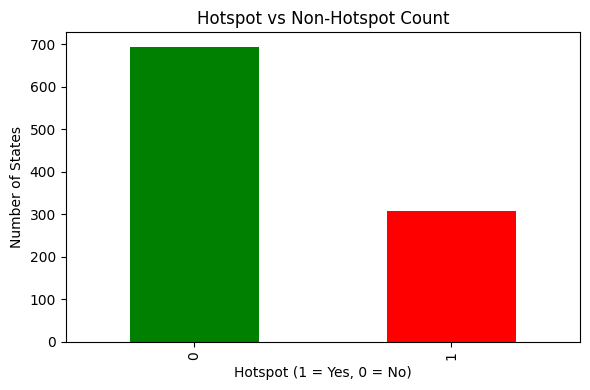

In [ ]:
plt.figure(figsize=(6,4))
df['Hotspot'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Hotspot vs Non-Hotspot Count")
plt.xlabel("Hotspot (1 = Yes, 0 = No)")
plt.ylabel("Number of States")
plt.tight_layout()
plt.show()


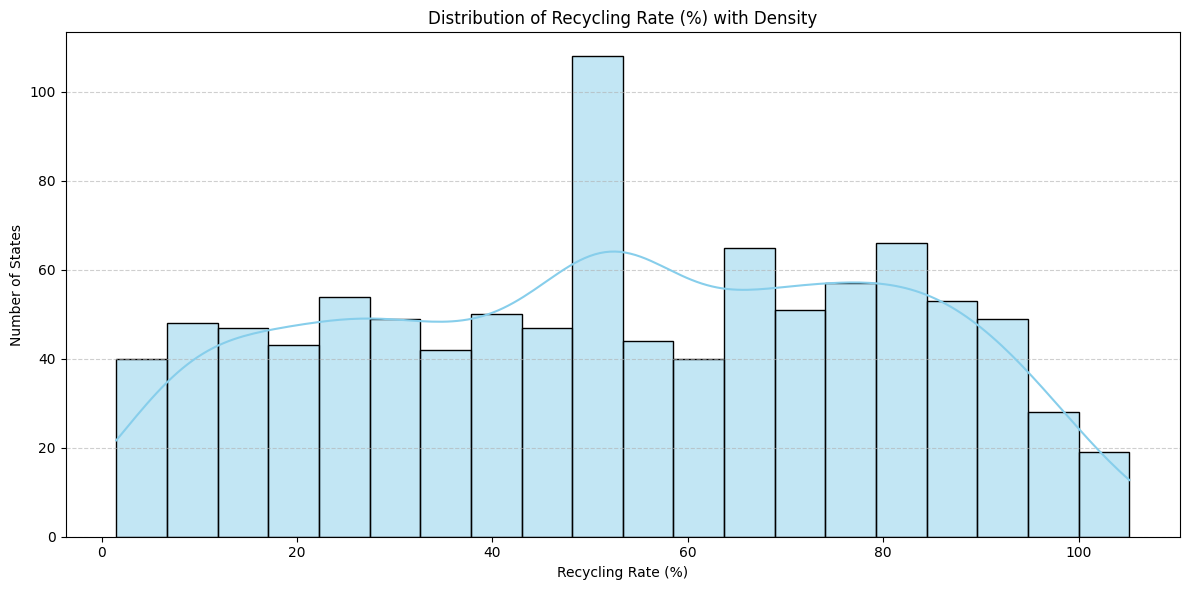

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Recycling_Rate_%'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Recycling Rate (%) with Density")
plt.xlabel("Recycling Rate (%)")
plt.ylabel("Number of States")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
